<a href="https://colab.research.google.com/github/morbarz/ML_Ex1/blob/main/ML_EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Mor Barzilay, 313322380
2.   Niv Sampson, 208398511

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [139]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
import os
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))


## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [57]:
# load the data
url = 'https://raw.githubusercontent.com/morbarz/ML_Ex1/main/customer_segmentation.csv'
df1 = pd.read_csv(url)
df1.head()
# Dataset is now stored in a Pandas Dataframe


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


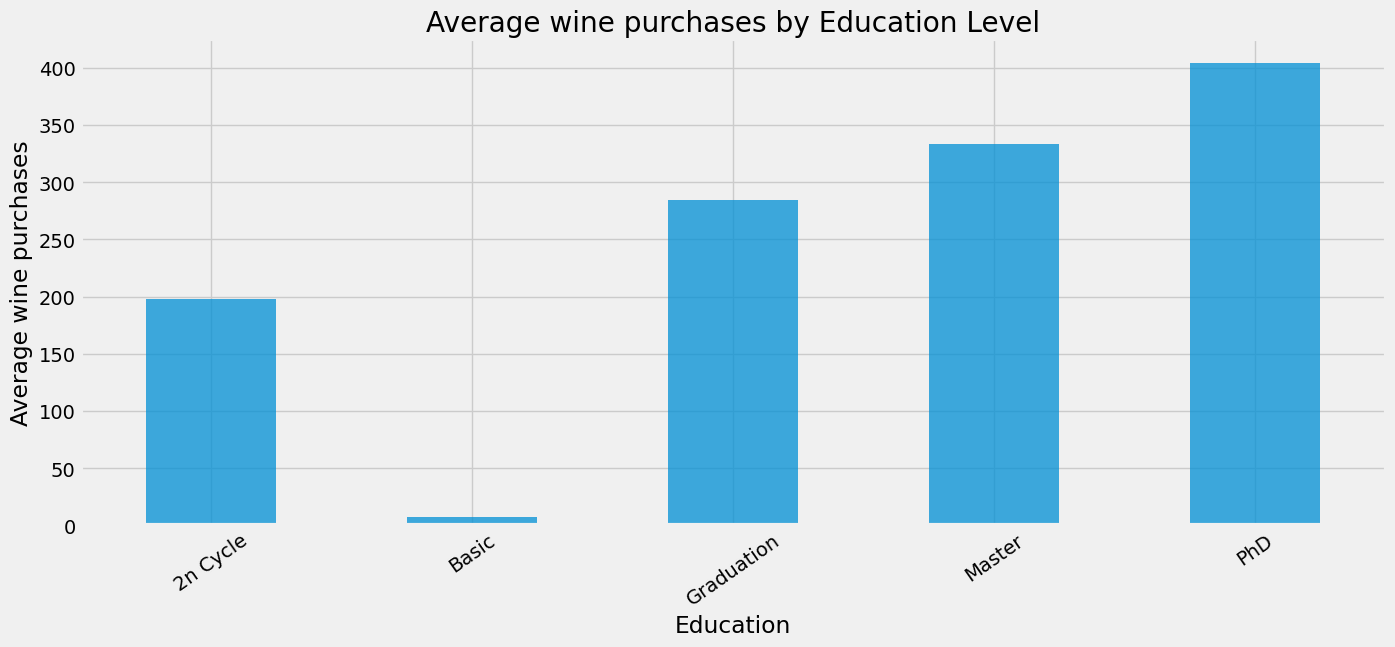

In [64]:
#Graph 1: indicates that customers with higher education levels tend to purchase more wine. Based on this observation,
# it is recommended to target customers with higher education levels when offering wine promotions
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 6))

# I want to aggregate the MntWines data for each education level
average_income_by_education = df.groupby('Education')['MntWines'].mean()

average_income_by_education.plot(kind='bar', figsize=(15, 6), alpha=0.75)

plt.xlabel('Education')
plt.ylabel('Average wine purchases')
plt.title('Average wine purchases by Education Level')
plt.xticks(rotation=35)
plt.show()


**Insight** -

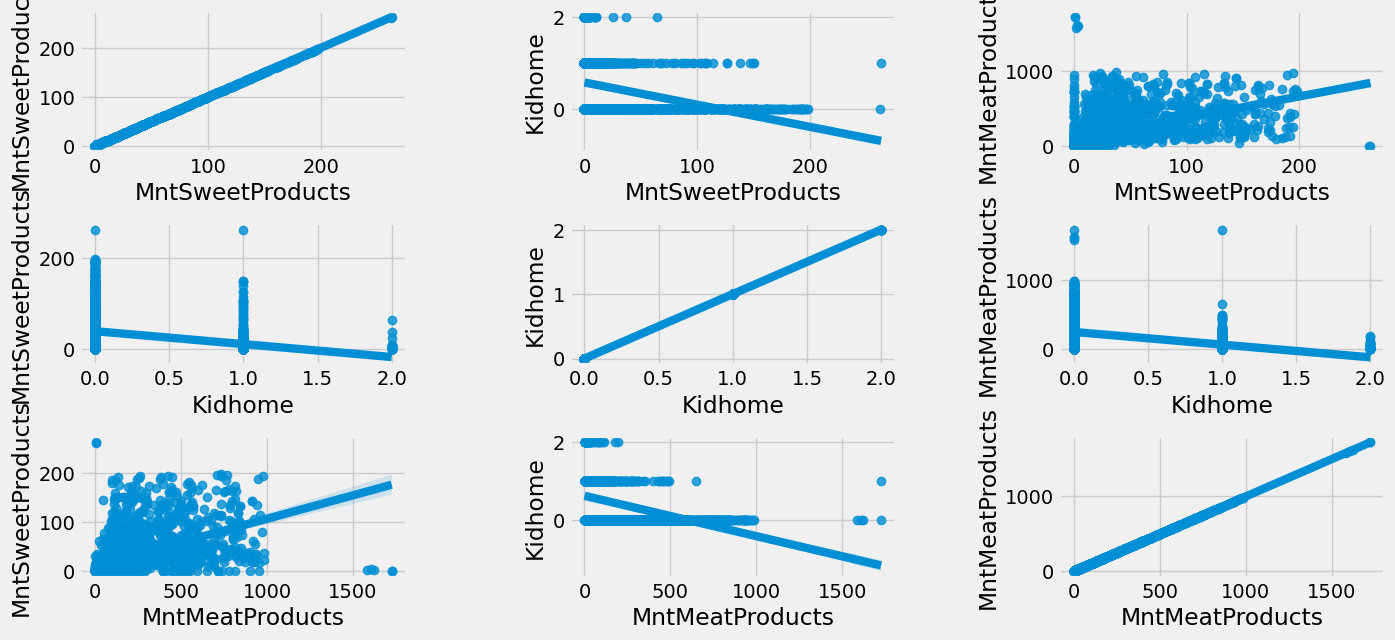

In [74]:
# Graph 2 -it is observed that costumer with kids at home tend to make lower purchases of sweet and meet products ,
#it is not recommended to target costumer with kids when offering meat and sweet products .
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['MntSweetProducts' , 'Kidhome' , 'MntMeatProducts']:
    for y in ['MntSweetProducts' , 'Kidhome' , 'MntMeatProducts']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

**Insight** -

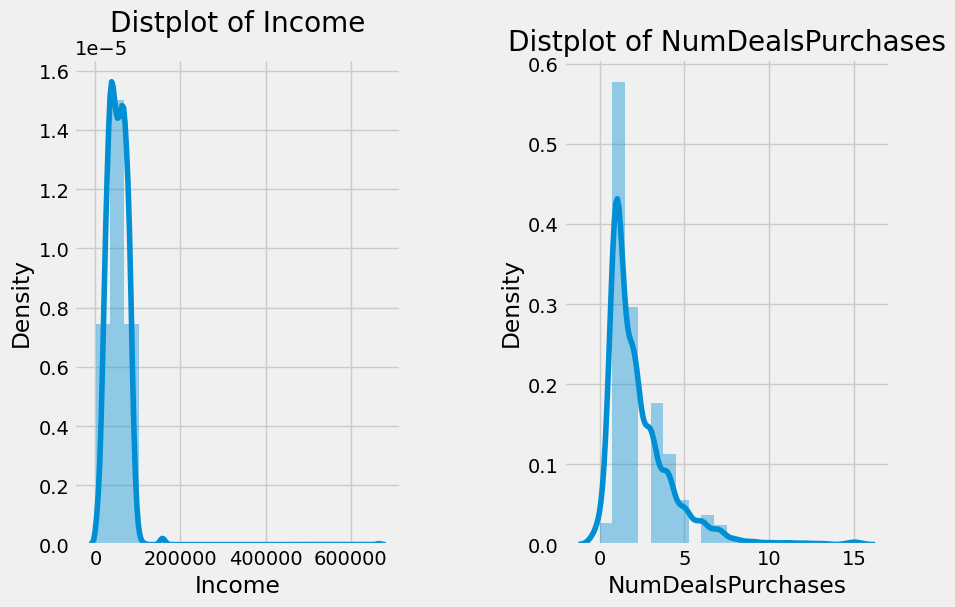

In [58]:
# Graph 3 -it is observed that customers with an average income tend to make the maximum number of Purchases deals.
# As income increases, the number of deals purchased decreases
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Income' , 'NumDealsPurchases']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))

plt.show()

**Insight** -

## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [140]:
# load the data
url = 'https://raw.githubusercontent.com/morbarz/ML_Ex1/main/customer_segmentation.csv'
df1 = pd.read_csv(url)
df1.head()
# Dataset is now stored in a Pandas Dataframe

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [141]:
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# First, ensure 'Dt_Customer' is in datetime format-->convert scalar to datatime
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])

# Calculate the duration in years from 'Dt_Customer' to today
df1['Years_As_Customer'] = (pd.Timestamp(datetime.now()) - df1['Dt_Customer']).dt.days / 365

current_year = datetime.now().year
df1['Customer_Age'] = current_year - df1['Year_Birth']

# Drop the 'Dt_Customer' and the birth year column
df1.drop(columns=['Dt_Customer', 'Year_Birth'], inplace=True)

numerical_columns = ['Customer_Age', 'Income', 'Kidhome', 'Teenhome', 'Years_As_Customer', 'Recency',
                     'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                     'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                     'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                     'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

categorical_columns = ['Education', 'Marital_Status']


# One-Hot Encode categorical variables
df1 = pd.get_dummies(df1, columns=categorical_columns)
# Apply MinMaxScaler to the numerical columns
scaler = MinMaxScaler(feature_range=(0, 1))
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df1_numerical = df1.select_dtypes(include=[np.number])  # This selects only numerical columns
df1[df1_numerical.columns] = imputer.fit_transform(df1_numerical)
print(df1)


           ID    Income  Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0      5524.0  0.084832      0.0       0.0  0.585859  0.425318   0.442211   
1      2174.0  0.067095      0.5       0.5  0.383838  0.007368   0.005025   
2      4141.0  0.105097      0.0       0.0  0.262626  0.285332   0.246231   
3      6182.0  0.037471      0.5       0.0  0.262626  0.007368   0.020101   
4      5324.0  0.085065      0.5       0.0  0.949495  0.115874   0.216080   
...       ...       ...      ...       ...       ...       ...        ...   
2235  10870.0  0.089472      0.0       0.5  0.464646  0.474883   0.216080   
2236   4001.0  0.093669      1.0       0.5  0.565657  0.271936   0.000000   
2237   7270.0  0.083092      0.0       0.0  0.919192  0.608171   0.241206   
2238   8235.0  0.101536      0.0       0.5  0.080808  0.286671   0.150754   
2239   9405.0  0.076908      0.5       0.5  0.404040  0.056263   0.015075   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         

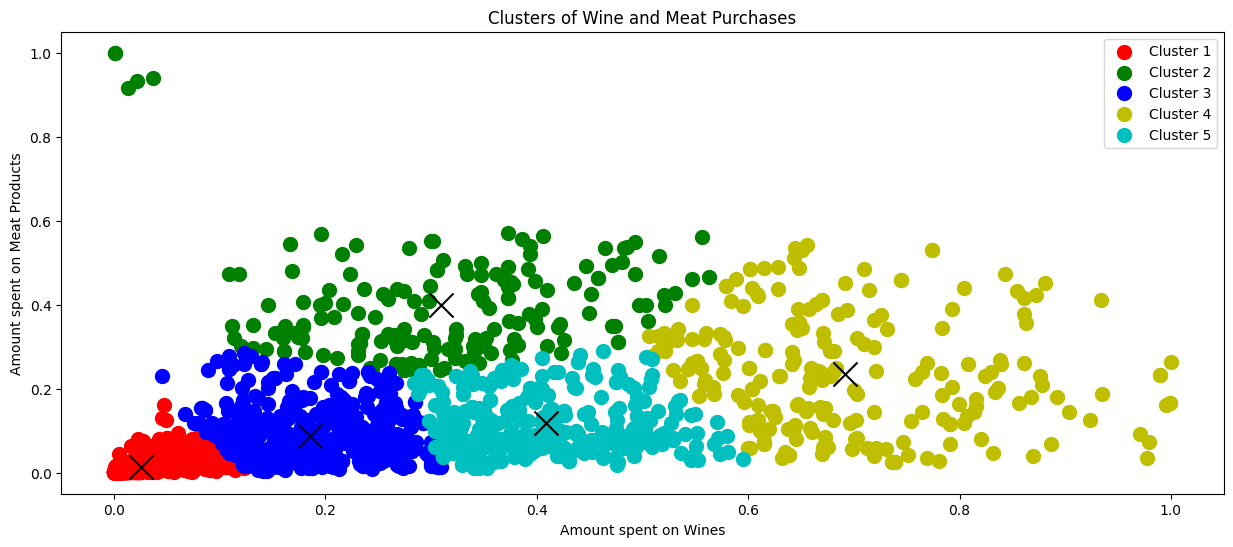

In [135]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5
#Amount spent on Wines and Amount spent on Meat Products
X2 = df2[['MntWines' , 'MntMeatProducts']].values
kmeans_alg = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
kmeans_alg.fit(X2)

# Getting the cluster labels
labels = kmeans_alg.labels_

# Centroids
centroids = kmeans_alg.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(15, 6))

colors = ['r', 'g', 'b', 'y', 'c']

for i in range(5):
    plt.scatter(X2[labels == i, 0], X2[labels == i, 1],
                s = 100, c = colors[i], label = f'Cluster {i+1}')
    plt.scatter(centroids[i, 0], centroids[i, 1], s = 300, c = 'black', marker = 'x')

plt.title('Clusters of Wine and Meat Purchases')
plt.xlabel('Amount spent on Wines')
plt.ylabel('Amount spent on Meat Products')
plt.legend()
plt.show()

### Elbow

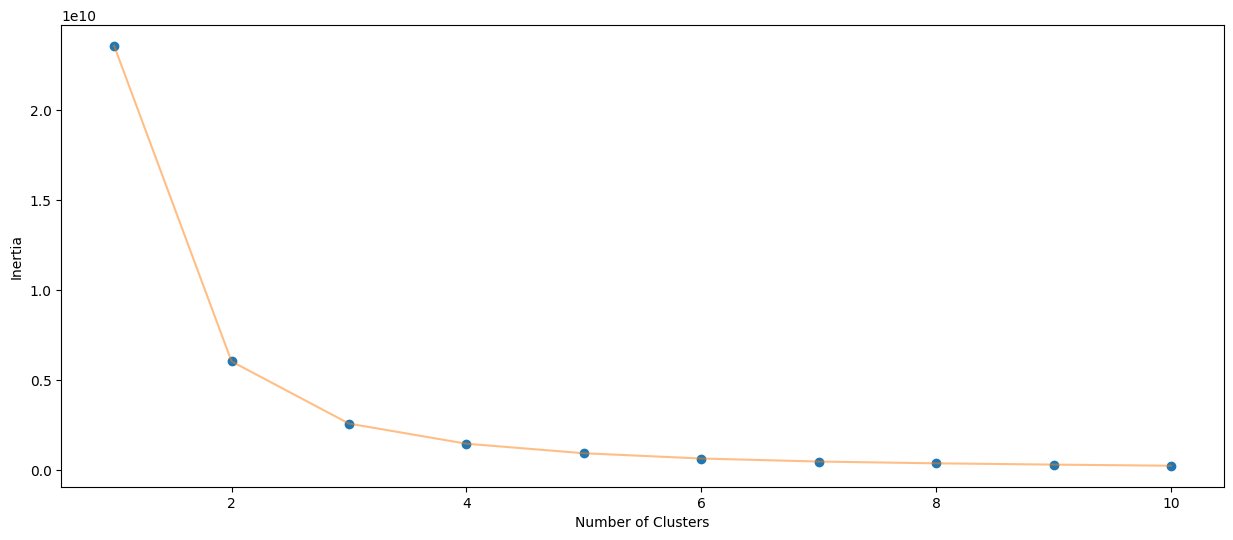

In [137]:
X_all = df1.values  # This includes all features in the DataFrame
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X_all)
    inertia.append(algorithm.inertia_)

#visualize Elbow
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()
#We can see that the best clustering is with k = 2 .

### Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.619512941001074
For n_clusters = 3 The average silhouette_score is : 0.5765972808043814
For n_clusters = 4 The average silhouette_score is : 0.5837691288296284
For n_clusters = 5 The average silhouette_score is : 0.548575851094958
For n_clusters = 6 The average silhouette_score is : 0.554916216580565


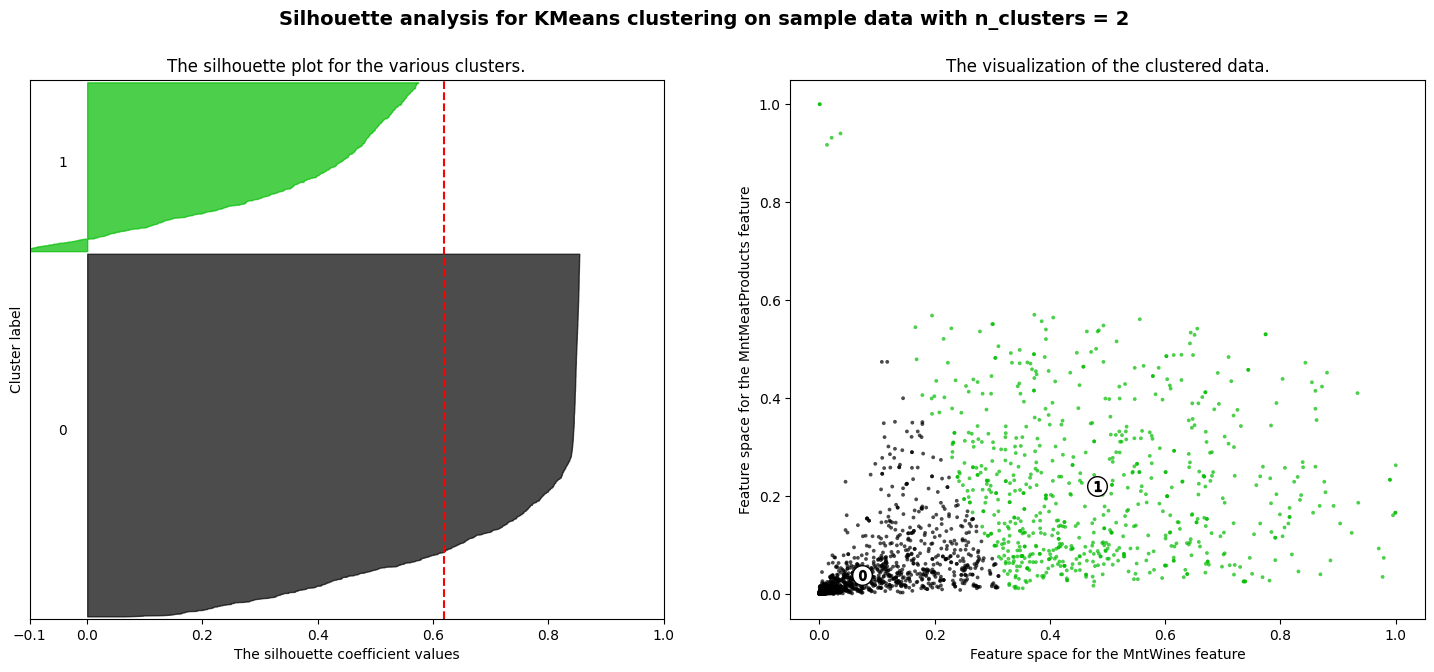

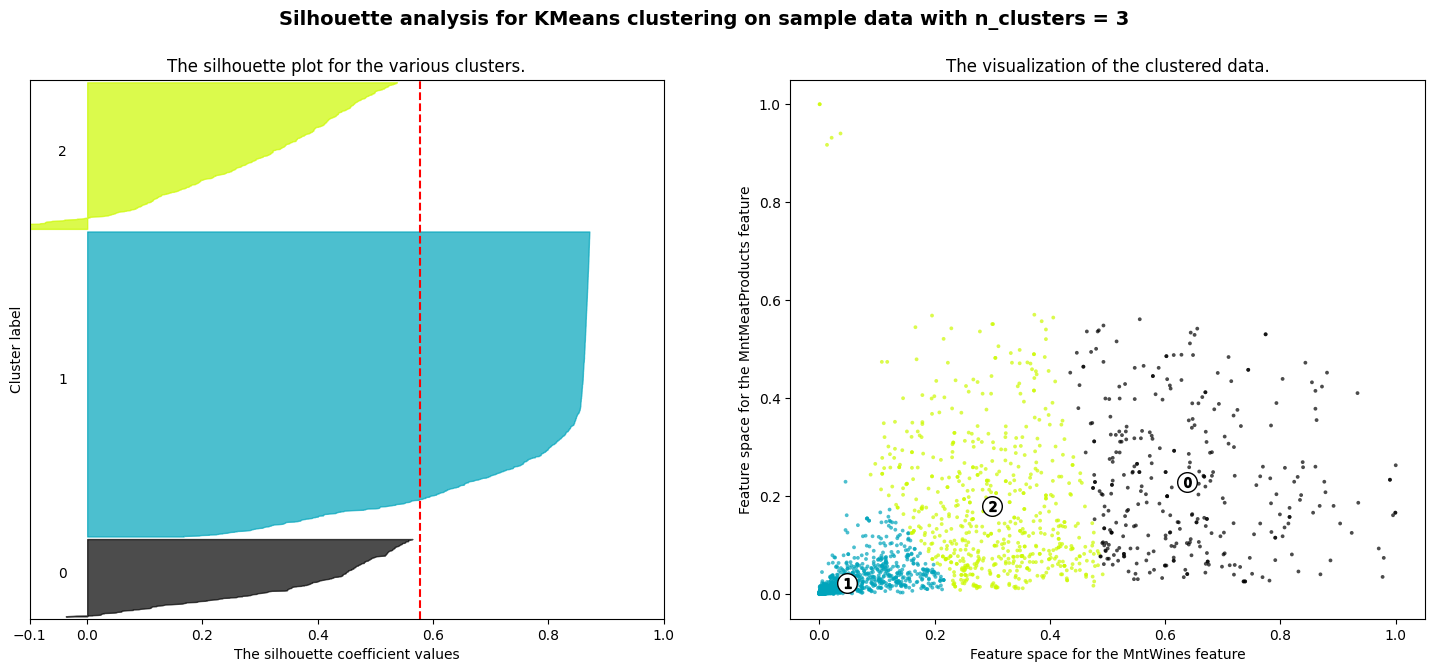

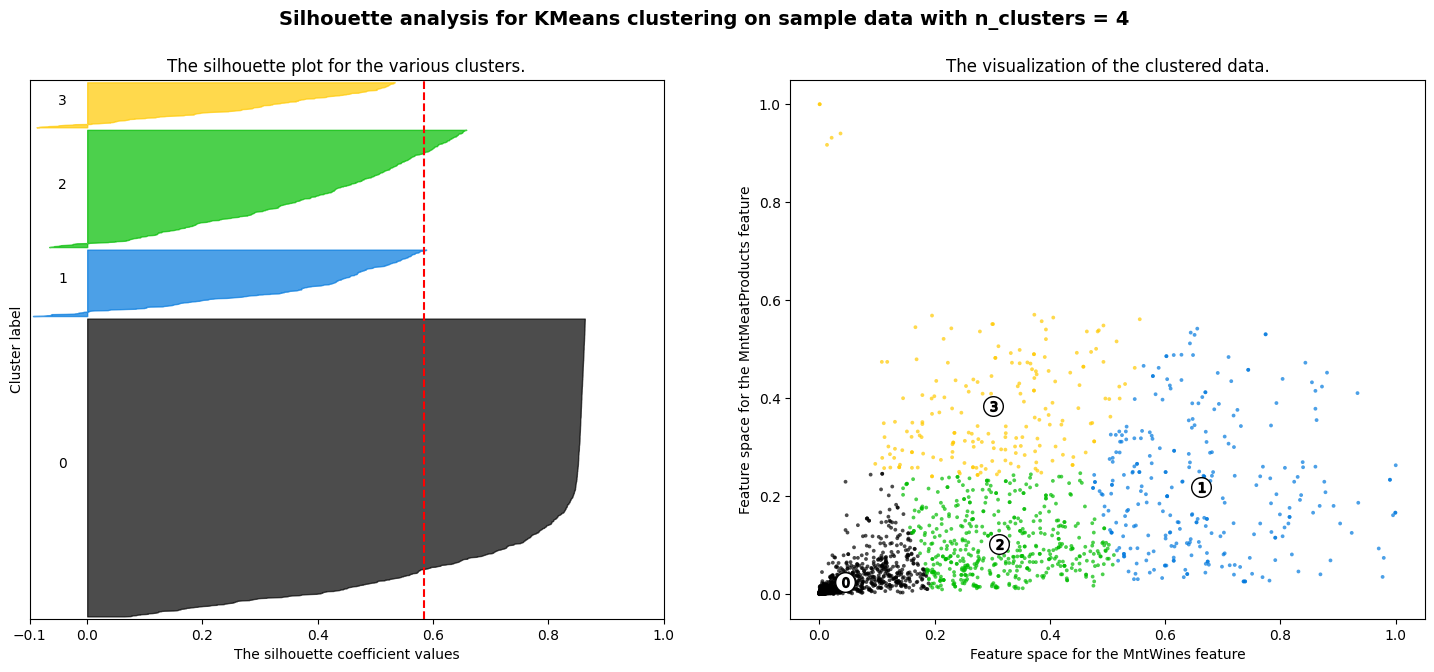

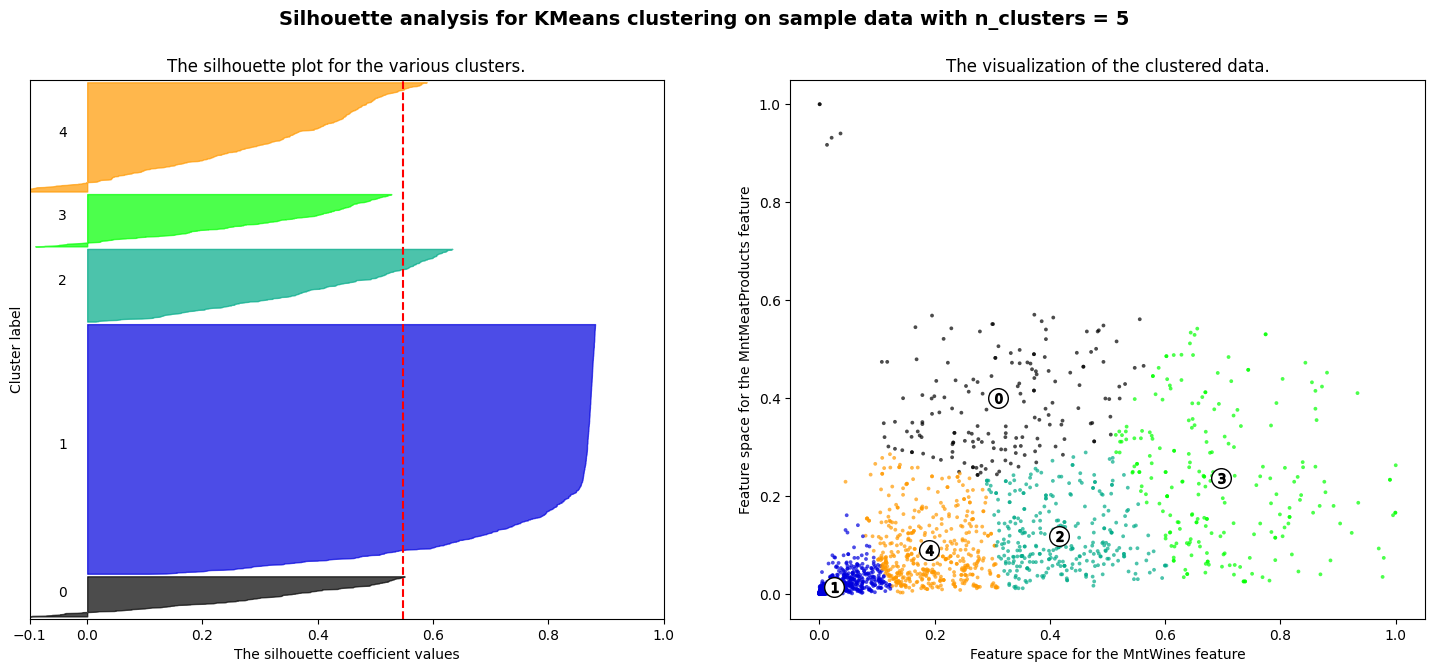

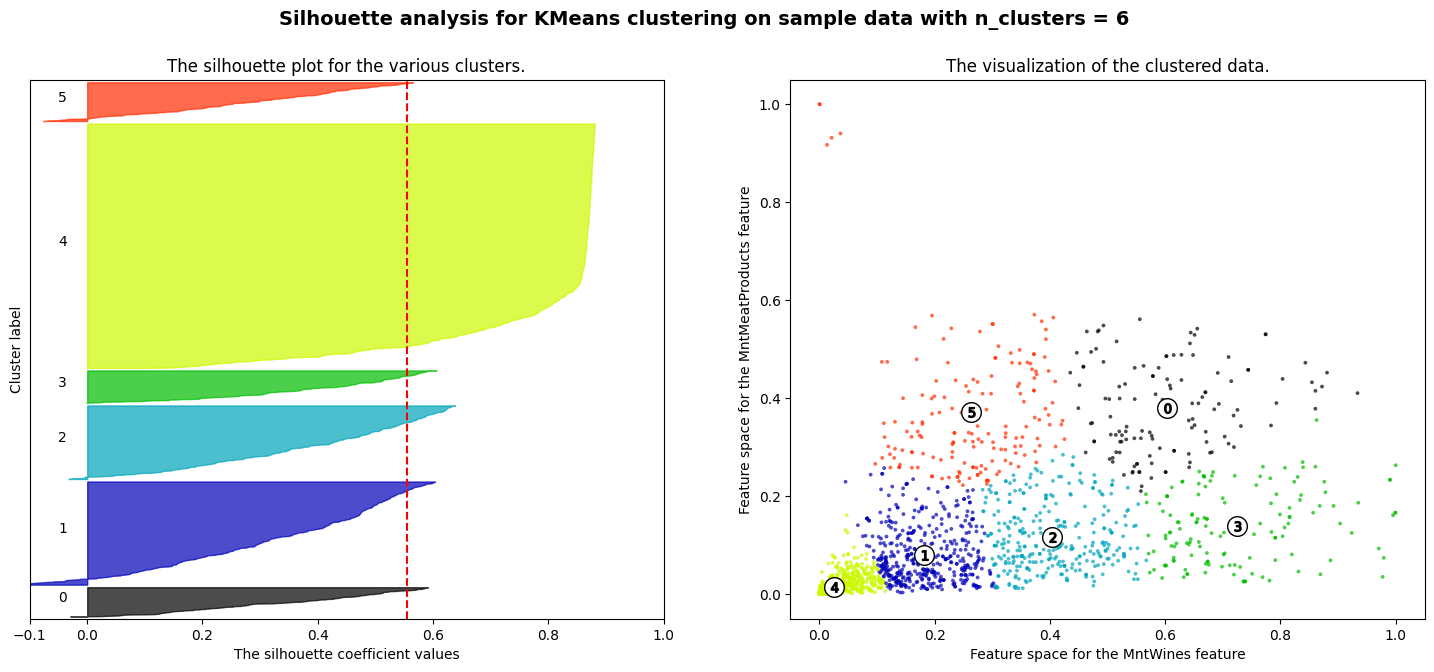

In [138]:

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)

    #X2 is the data we want to check (Amount spent on Wines and Amount spent on Meat Products)
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X2[:, 0], X2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the MntWines feature")
    ax2.set_ylabel("Feature space for the MntMeatProducts feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
#also here the best clutering partiotionin is for 2 clusters

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





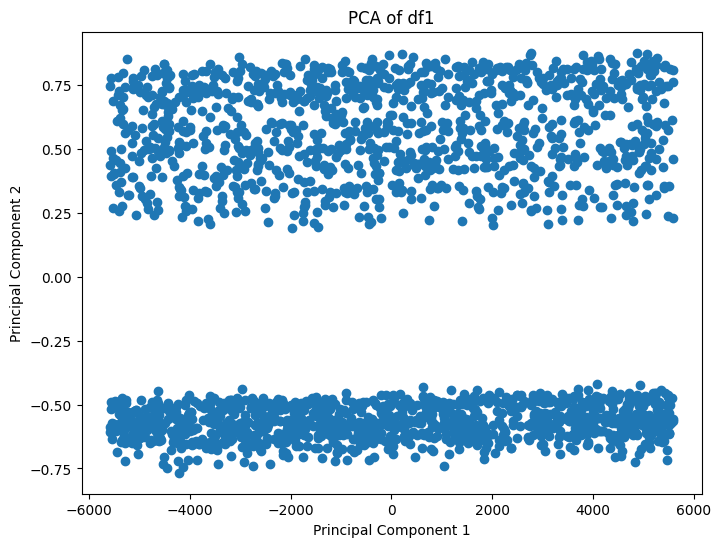

Explained variance ratio: [9.99999771e-01 3.28421479e-08]
Singular values: [1.53625798e+05 2.78406889e+01]


In [152]:
# Adjust n_components as needed
pca = PCA(n_components=2)
pca.fit(df1)

principalComponents = pca.transform(df1)

# Create a DataFrame with the principal components

pca_df = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])


# Plotting the PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of df1')
plt.show()

# Display explained variance
# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the singular values associated with each component
print("Singular values:", pca.singular_values_)

**Q**: What is the variance explained in the 2 component PCA?

**A**:we can see that the dataset variance is almost entierly capturedby the first component , so we can reduce the second component .

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





In [ ]:
# Adjust n_components as needed
#Find he best k for kmeans:

### Elbow

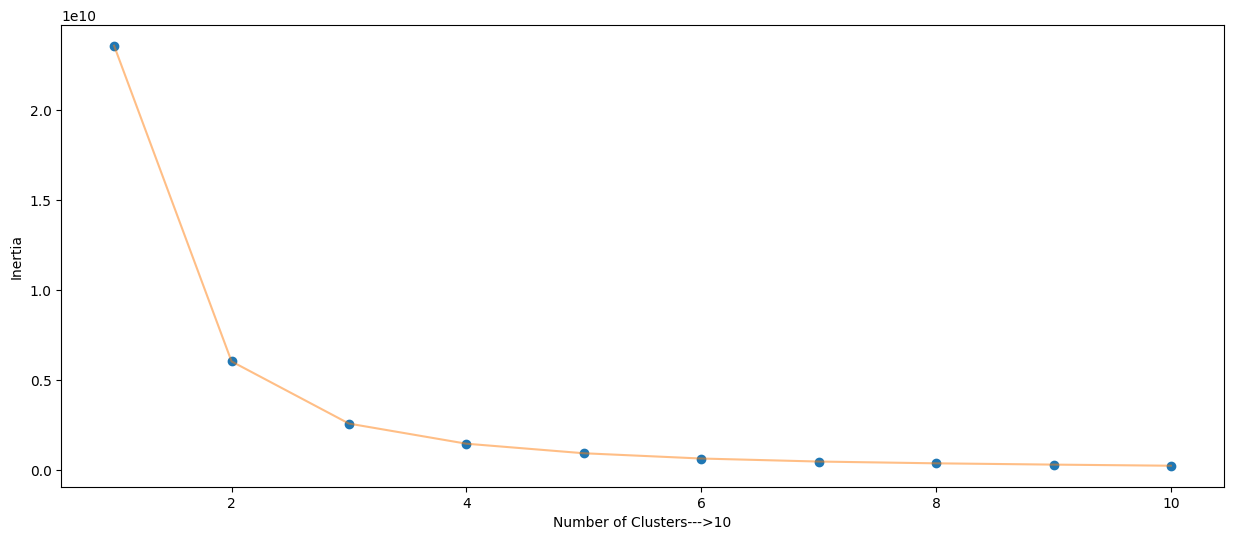

In [157]:
X_all = pca_df.values  # This includes all features in the DataFrame
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X_all)
    inertia.append(algorithm.inertia_)

diff = np.diff(inertia)
k_optimal = np.argmax(diff) + 2

#visualize Elbow
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters--->' + str(k_optimal)) , plt.ylabel('Inertia')
plt.show()
#We can see that the best clustering is with k = 2 .

### Silhouette

For n_clusters = 2 The average silhouette_score is : 0.6205040250107552
For n_clusters = 3 The average silhouette_score is : 0.5974703649252786
For n_clusters = 4 The average silhouette_score is : 0.5759110889201626
For n_clusters = 5 The average silhouette_score is : 0.5668192335730853
For n_clusters = 6 The average silhouette_score is : 0.5640393398079642


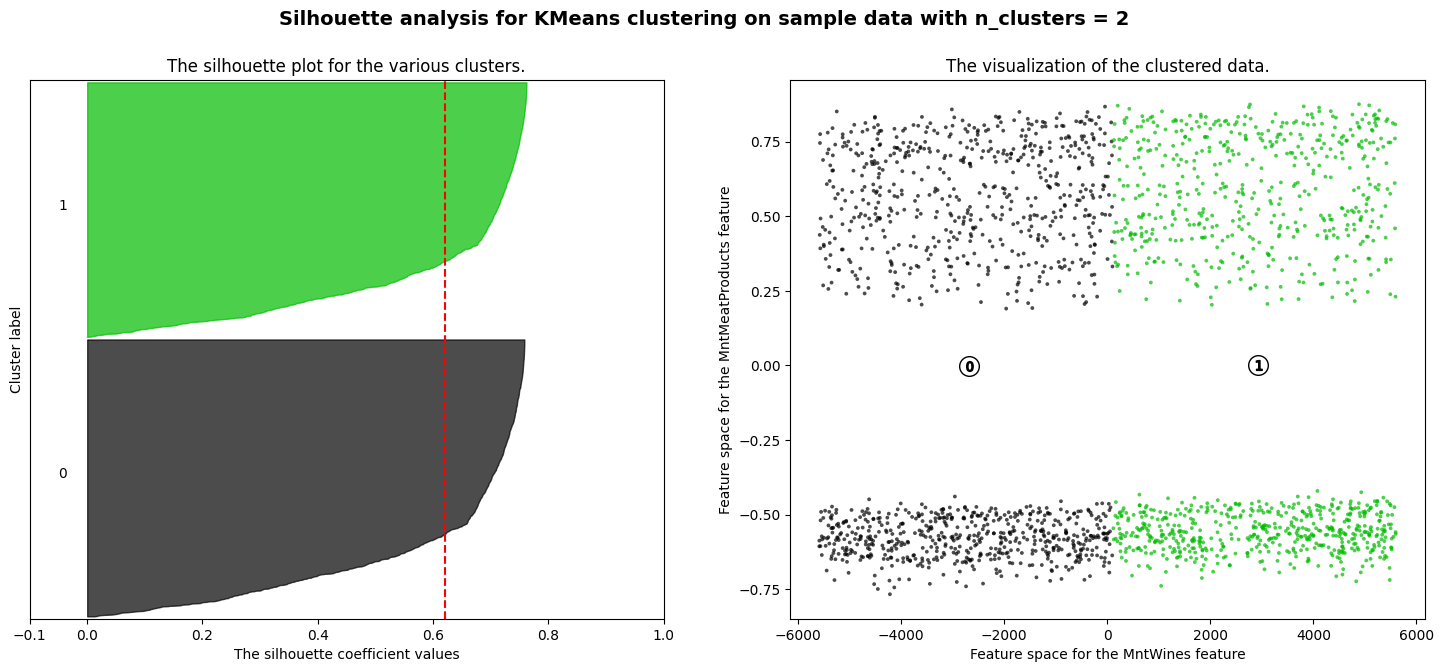

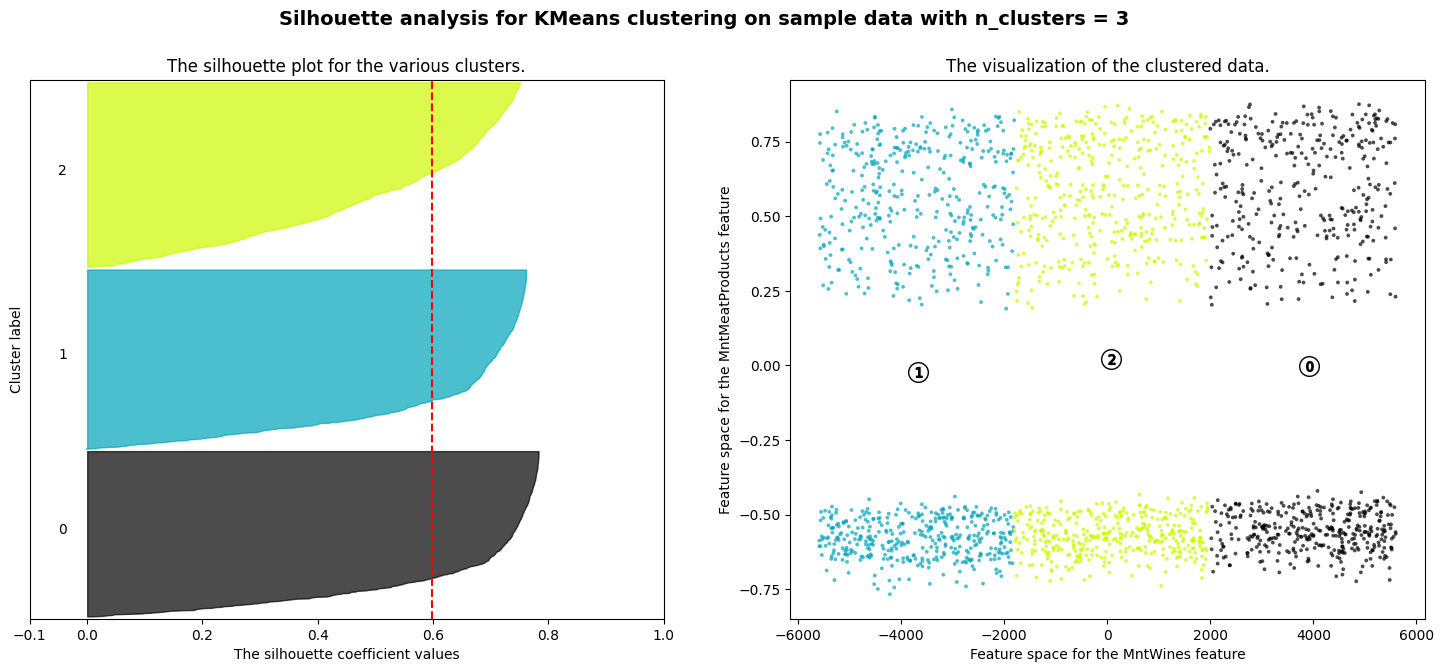

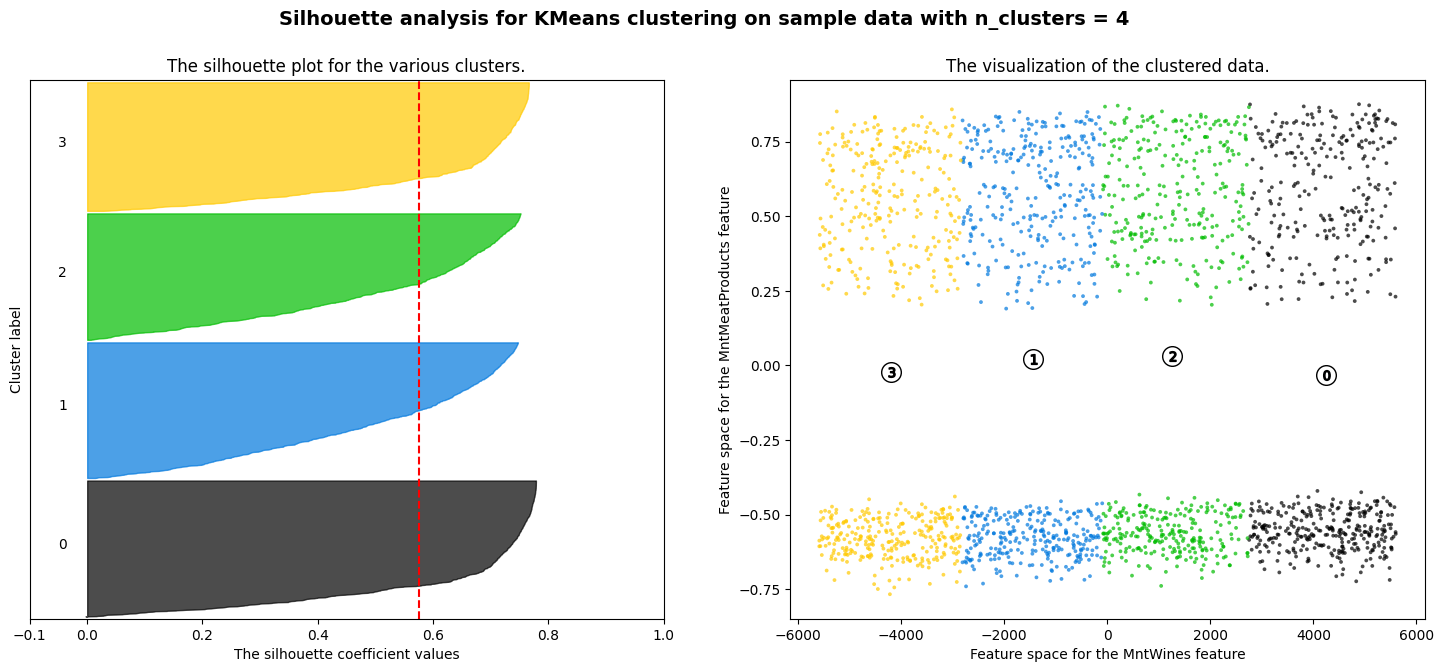

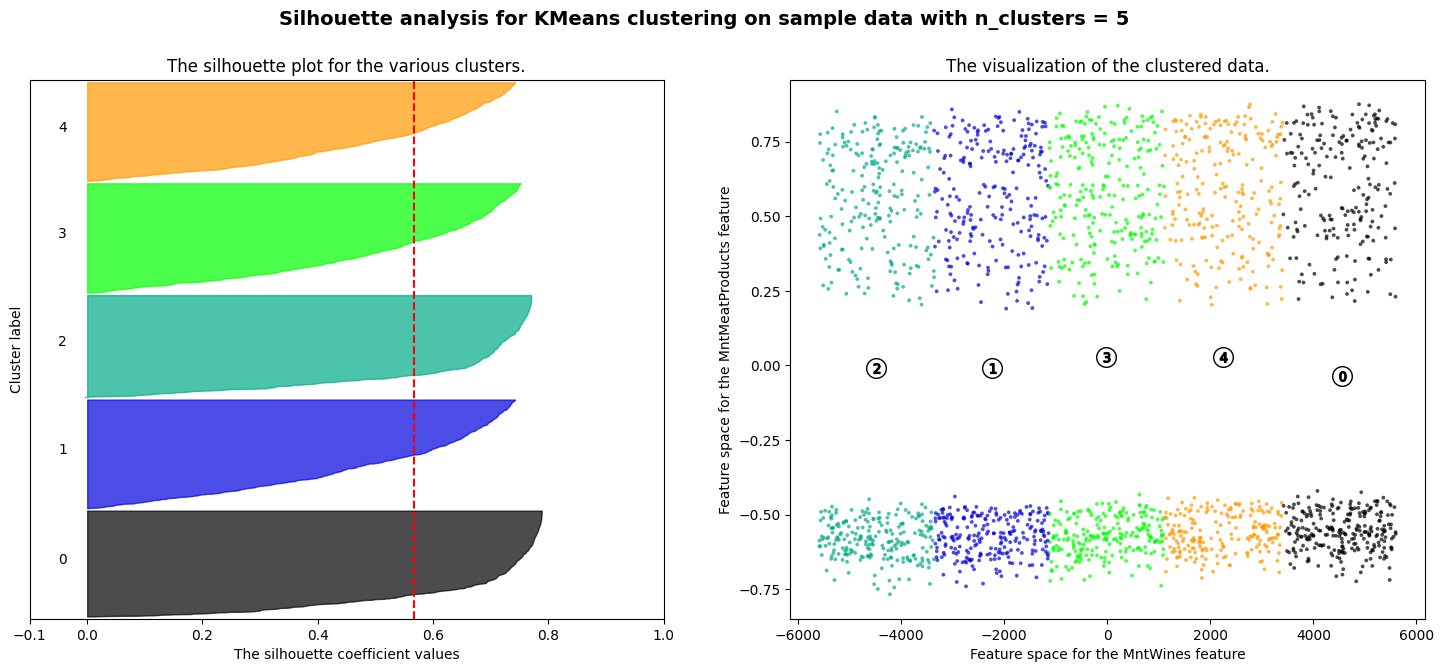

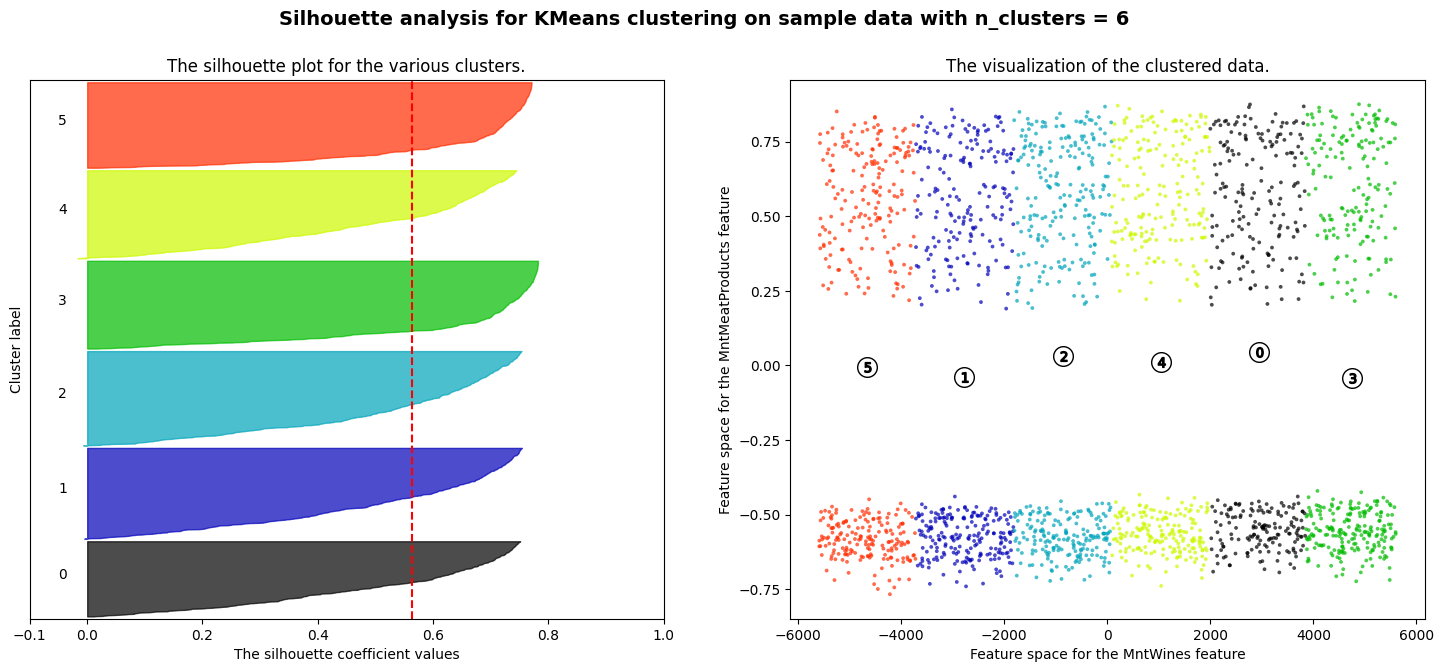

In [154]:

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X_all) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_all)

    #X_all is the data we want to check ]
    silhouette_avg = silhouette_score(X_all, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_all, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_all[:, 0], X_all[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the MntWines feature")
    ax2.set_ylabel("Feature space for the MntMeatProducts feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
#also here the best clutering partiotionin is for 2 clusters

**Q**: In our human eye, it's looks like we need 5 clusters.

---

But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:

## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:



## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}